In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def flexura_num(x, Te, p, rhoi=1_000.0, rompida=False):
    dx = x[1] - x[0]

    E = 1.0e11
    v = 0.25
    g = 9.8
    rhom = 3_300.0
    drho = rhom - rhoi

    D = E * Te**3.0 / (12.0 * (1 - v**2.0))

    n = np.size(x)

    A = np.zeros((n, n))

    A[range(n), range(n)] = 6.0 * D + dx**4 * drho * g
    A[range(n-1), range(1,n)] = A[range(1, n), range(n-1)] = -4.0 * D
    A[range(n-2), range(2,n)] = A[range(2, n), range(n-2)] = D

    if rompida == True:
        A[0, 0] = 2.0 * D + dx**4 * drho * g
        A[0, 2] = 2.0 * D
        A[1, 0] = -2.0 * D
        A[1, 1] = 5.0 * D + dx**4 * drho * g

    q = p * dx**4

    w = np.linalg.solve(A, q)
    return w

/tmp/ipykernel_5150/396964135.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


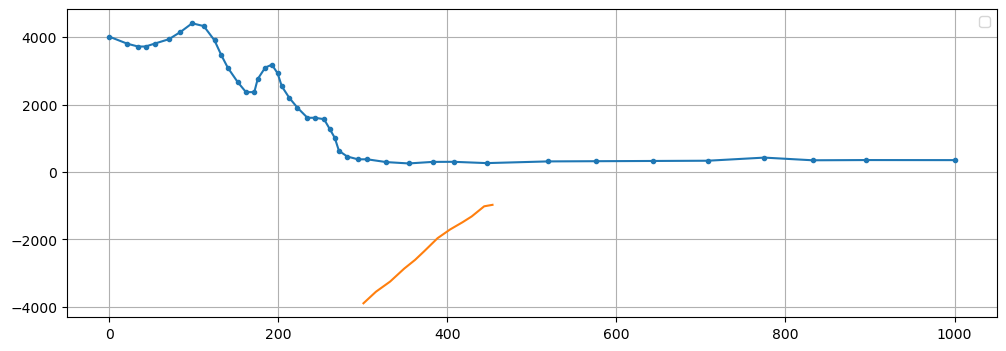

In [3]:
fpath = "/content/drive/MyDrive/bacias/data/"
xo, ho = np.loadtxt("../../data/Andes_profile.txt", unpack=True)
xb, hb = np.loadtxt("../../data/Beni_profile.txt", unpack=True)

plt.figure(figsize=(12,4))
plt.plot(xo, ho, '.-')
plt.plot(xb, hb)
plt.legend()
plt.grid()

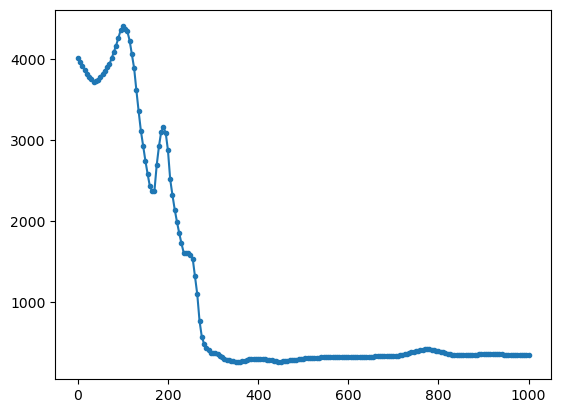

In [4]:
dx = 5.0 # km espacamento escolhido
L = 1000.0 # Dominio do nosso problema numerico
x = np.arange(0,L+dx,dx)
h = np.interp(x,xo,ho)

plt.plot(x,h, ".-")

Resolvi o problema usando duas abordagens diferentes.

1)

Minimum error: 16.680728359962135
Te: 83600.0


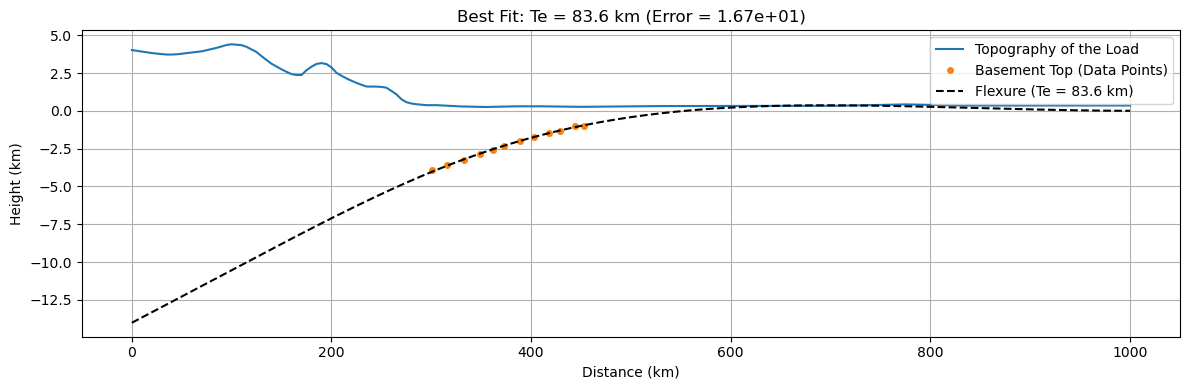

In [5]:
h_load = np.copy(h)
cond = x >= 300.0
h_load[cond] = 0.0

g = 9.8
rhoc = 2700.0  # density of the mountain range (load) in kg/m³
p = -rhoc * g * h_load
rhos = 2500  # density of sedimentary rock in foreland basins

Te_list = np.arange(1.0e3, 200.0e3, 0.1e3)

errors = dict()
for Te in Te_list:
    error = 0
    w = flexura_num(x * 1000.0, Te, p, rhoi=rhos, rompida=True)

    for i in range(len(xb)):
        hx = np.interp(xb[i], x, w)
        error += (hb[i] - hx) ** 2

    errors[Te] = np.sqrt(error) / len(xb)

Te_best = list(errors.keys())[list(errors.values()).index(min(errors.values()))]
min_error = min(errors.values())

print("Minimum error:", min_error)
print("Te:", Te_best)

w_best = flexura_num(x * 1.0e3, Te=Te_best, p=p, rhoi=rhos, rompida=True)
plt.figure(figsize=(12, 4))
plt.title(f"Best Fit: Te = {Te_best * 1.0e-3:.1f} km (Error = {min_error:.2e})")
plt.plot(x, h / 1.0e3, label="Topography of the Load", linewidth=1.5)
plt.plot(xb, hb / 1.0e3, 'o', label="Basement Top (Data Points)", markersize=4)
plt.plot(x, w_best / 1.0e3, '--', color='black', label=f"Flexure (Te = {Te_best * 1.0e-3:.1f} km)", linewidth=1.5)
plt.xlabel("Distance (km)")
plt.ylabel("Height (km)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2)

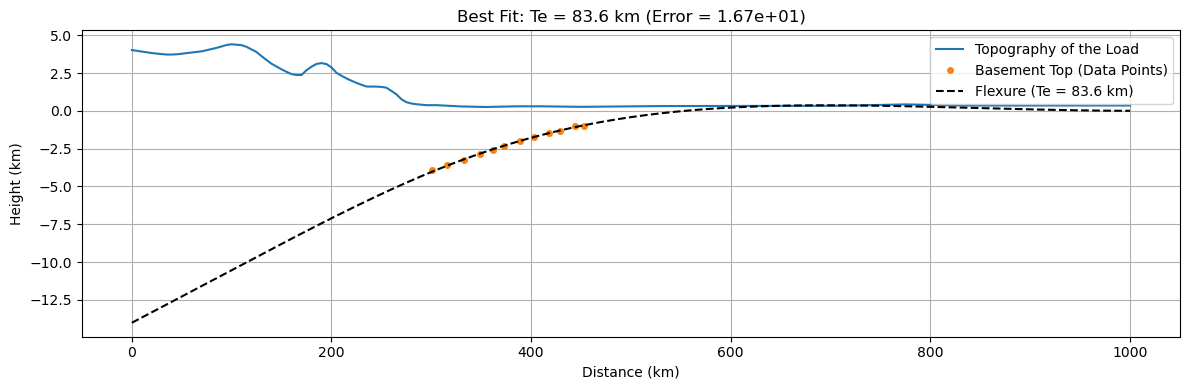

Best Fit Parameters:
Te = 83.6 km
Minimum Error = 1.67e+01


In [6]:
Te_list = np.arange(1.0e3, 200.0e3, 0.1e3)
errors = np.zeros_like(Te_list)

for i, Te in enumerate(Te_list):
    w = flexura_num(x * 1.0e3, Te, p, rhoi=rhos, rompida=True)

    # Interpolate and compute the error
    hx = np.interp(xb, x, w)
    hx = np.interp(xb, x, w)
    error = np.sqrt(np.sum((hb - hx) ** 2)) / len(xb)
    
    errors[i] = error

min_error_index = np.argmin(errors)
Te_best = Te_list[min_error_index]
min_error = errors[min_error_index]

w_best = flexura_num(x * 1.0e3, Te=Te_best, p=p, rhoi=rhos, rompida=True)

plt.figure(figsize=(12, 4))
plt.title(f"Best Fit: Te = {Te_best * 1.0e-3:.1f} km (Error = {min_error:.2e})")
plt.plot(x, h / 1.0e3, label="Topography of the Load", linewidth=1.5)
plt.plot(xb, hb / 1.0e3, 'o', label="Basement Top (Data Points)", markersize=4)
plt.plot(x, w_best / 1.0e3, '--', color='black', label=f"Flexure (Te = {Te_best * 1.0e-3:.1f} km)", linewidth=1.5)
plt.xlabel("Distance (km)")
plt.ylabel("Height (km)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Best Fit Parameters:\nTe = {Te_best * 1.0e-3:.1f} km\nMinimum Error = {min_error:.2e}")
